In [1]:
from tensorflow.keras import datasets

# Load the train and test data for the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data()

# Normalize the value between [0, 1]
train_data, test_data = train_data/255.0, test_data/255.0

print('Train samples: ', len (train_data))
print('Test samples: ', len (test_data))

Using TensorFlow backend.


Train samples:  60000
Test samples:  10000


In [2]:
from tensorflow.keras.utils import to_categorical

train_labels_cat, test_labels_cat = to_categorical(train_labels), to_categorical(test_labels)

Text(0.5, 1.0, 'Digit: 5')

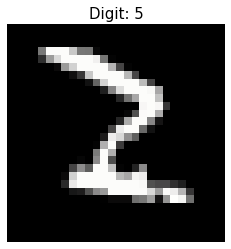

In [3]:
import seaborn_image as isns

# Plot an example image and its label
isns.imshow(train_data[0], despine=True, cbar=False, cmap='gray')\
    .set_title('Digit: {}'.format(train_labels[0]))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Create, compile and fit the model
model = Sequential([
    # Conv2D(24, (3,3), activation='relu', input_shape=(28,28,1)),
    # MaxPooling2D((2,2)),
    # Dropout(0.25),
    # Conv2D(36, (3,3), activation='relu'),
    # MaxPooling2D((2,2)),
    # Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='linear', name='visualized')
])
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=[SparseCategoricalAccuracy()],
)
model.fit(
    train_data,
    train_labels,
    epochs=6
)

2022-02-14 19:34:27.619170: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2573 - sparse_categorical_accuracy: 0.9264

In [5]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 0s 561us/step - loss: 0.0753 - sparse_categorical_accuracy: 0.9759
Test accuracy: 0.9758999943733215


Text(0.5, 1.0, 'Predicted: [1]\nReal: 1')

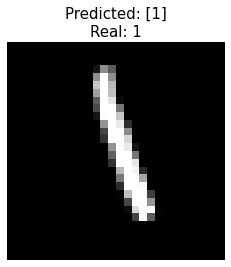

In [6]:
img_num = 5

# Use the model to predict the label for an image
predictions = model.predict(test_data).argmax(axis=1)

# Get the predicted label out fo the predictions

isns.imshow(test_data[img_num], despine=True, cbar=False, cmap='gray')\
    .set_title('Predicted: {}\nReal: {}'.format([predictions[img_num]], test_labels[img_num]))

In [7]:
import innvestigate

analyzer = innvestigate.create_analyzer("gradient", model)

analysis = analyzer.analyze(test_data)

ImportError: cannot import name 'Iterable' from 'collections' (/usr/local/Caskroom/miniconda/base/envs/thesis/lib/python3.10/collections/__init__.py)